In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
data=pd.read_csv("iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [125]:
df=pd.DataFrame(data)
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [126]:
len_var=(df[['sepal.length','variety']])
print(len_var)

     sepal.length    variety
0             5.1     Setosa
1             4.9     Setosa
2             4.7     Setosa
3             4.6     Setosa
4             5.0     Setosa
..            ...        ...
145           6.7  Virginica
146           6.3  Virginica
147           6.5  Virginica
148           6.2  Virginica
149           5.9  Virginica

[150 rows x 2 columns]


In [127]:
flt_data = (df[df['petal.width'] > 1.5]).head()
print(flt_data)

    sepal.length  sepal.width  petal.length  petal.width     variety
56           6.3          3.3           4.7          1.6  Versicolor
70           5.9          3.2           4.8          1.8  Versicolor
77           6.7          3.0           5.0          1.7  Versicolor
83           6.0          2.7           5.1          1.6  Versicolor
85           6.0          3.4           4.5          1.6  Versicolor


In [128]:
print(df['sepal.length'].sum())

876.5


In [129]:
df['sepal.area'] = df['sepal.length']*df['sepal.width']
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety  sepal.area
0           5.1          3.5           1.4          0.2  Setosa       17.85
1           4.9          3.0           1.4          0.2  Setosa       14.70
2           4.7          3.2           1.3          0.2  Setosa       15.04
3           4.6          3.1           1.5          0.2  Setosa       14.26
4           5.0          3.6           1.4          0.2  Setosa       18.00


In [130]:
flt_data = (df[df['variety']=='Setosa'].head())
print(flt_data)

   sepal.length  sepal.width  petal.length  petal.width variety  sepal.area
0           5.1          3.5           1.4          0.2  Setosa       17.85
1           4.9          3.0           1.4          0.2  Setosa       14.70
2           4.7          3.2           1.3          0.2  Setosa       15.04
3           4.6          3.1           1.5          0.2  Setosa       14.26
4           5.0          3.6           1.4          0.2  Setosa       18.00


In [131]:
max_length = df['sepal.length'].max()
print(max_length)

7.9


In [132]:
group=df.groupby('variety')['sepal.length'].max()
print(group)

variety
Setosa        5.8
Versicolor    7.0
Virginica     7.9
Name: sepal.length, dtype: float64


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x=df[['sepal.length','sepal.width','petal.length','petal.width']]
y=df[['variety']]

In [135]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [136]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [137]:
svm_model=SVC()
dt_model=DecisionTreeClassifier()
svm_model.fit(X_train,y_train)
dt_model.fit(X_train,y_train)

C:\Users\chris\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [138]:
s_p=svm_model.predict(X_test)
d_p=dt_model.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [140]:
cm_s=confusion_matrix(y_test,s_p)
cm_s

array([[8, 0, 0],
       [0, 9, 0],
       [0, 4, 9]])

In [141]:
cm_dt=confusion_matrix(y_test,d_p)
cm_dt

array([[ 8,  0,  0],
       [ 0,  9,  0],
       [ 0,  3, 10]])

In [142]:
s_ac=accuracy_score(y_test,s_p)
dt_ac=accuracy_score(y_test,d_p)
s_ac,dt_ac

(0.8666666666666667, 0.9)

<BarContainer object of 2 artists>

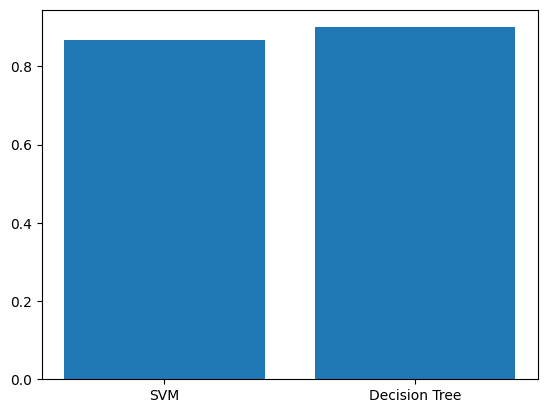

In [143]:
d=[s_ac,dt_ac]
label=["SVM","Decision Tree"]
plt.bar(label,d)